In [70]:
from data_processing.preprocess import KaggleDataset, KaggleDatasetWithQuestion
import json
from sklearn.manifold import TSNE
kaggle_with_question = KaggleDatasetWithQuestion("data/kaggleWithQuestion.csv")
data = kaggle_with_question.poster_data
import numpy as np

In [96]:
i= [[1, 2, 3], [4,5,6]]
j = [[7,8,9], [10,11,12]]
i.extend(j)
print(i)

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


In [68]:
for i in range(len(data)):
    num = 0
    for p in data[i]['posts']:
        if p.strip() == '':
            continue
        num += 1
    print(str(i) + '\t' + str(num) + '\t' + data[i]['label0'])
    
# 0 - I
# 1 - E

# 0 - 4,5 7
# 1- 3, 6 , 9

0	34	0
1	53	1
2	44	1
3	50	1
4	50	0
5	50	0
6	50	1
7	50	0
8	50	0
9	50	1
10	50	0
11	40	1
12	50	0
13	50	1
14	50	0
15	49	0
16	50	0
17	49	0
18	50	1
19	50	0
20	48	0
21	50	0
22	50	1
23	34	0
24	50	1
25	50	0
26	50	0
27	50	0
28	50	1
29	49	0
30	47	0
31	50	0
32	50	1
33	50	0
34	50	0
35	50	1
36	50	0
37	49	0
38	47	0
39	49	0
40	49	0
41	21	0
42	50	1
43	50	0
44	44	0
45	50	0
46	50	0
47	44	0
48	37	1
49	50	0
50	50	0
51	49	0
52	45	0
53	50	1
54	50	0
55	50	0
56	42	1
57	48	0
58	49	0
59	50	0
60	48	0
61	50	0
62	28	0
63	37	0
64	50	0
65	48	0
66	49	1
67	27	0
68	42	0
69	50	1
70	46	1
71	50	0
72	50	1
73	48	1
74	50	0
75	50	1
76	50	0
77	48	0
78	49	1
79	50	1
80	50	0
81	49	1
82	50	0
83	50	0
84	50	0
85	50	1
86	50	1
87	48	0
88	43	0
89	50	0
90	50	0
91	50	1
92	38	0
93	50	0
94	50	0
95	50	0
96	55	0
97	50	0
98	52	0
99	50	0
100	49	0
101	50	0
102	50	0
103	27	1
104	50	1
105	48	0
106	45	0
107	50	0
108	50	1
109	50	1
110	50	0
111	50	0
112	38	0
113	50	0
114	50	0
115	50	0
116	50	0
117	50	0
118	45	0
119	50	0
120	50	1
121	50	1
122	40	0
123

In [106]:
tsne = TSNE(n_components=2, perplexity=30)
# 0 - 4,5 7
# 1- 3, 6 , 9
i_data = [4, 5, 7]
e_data = [3, 6, 9]
embedding0 = []
embedding1 = []
for i in i_data:
    with open(f"/home/wenkail/anlp_final/src/data/embedding/embedding{i}.json", "r") as file:
        data0 = json.load(file)
    embedding0.extend(data0['pair_embeddings'])
for i in e_data:
    with open(f"/home/wenkail/anlp_final/src/data/embedding/embedding{i}.json", "r") as file:
        data1 = json.load(file)
    embedding1.extend(data1['pair_embeddings'])

In [109]:
tsne_embedding0 = tsne.fit_transform(np.array(embedding0))
tsne_embedding1 = tsne.fit_transform(np.array(embedding1))

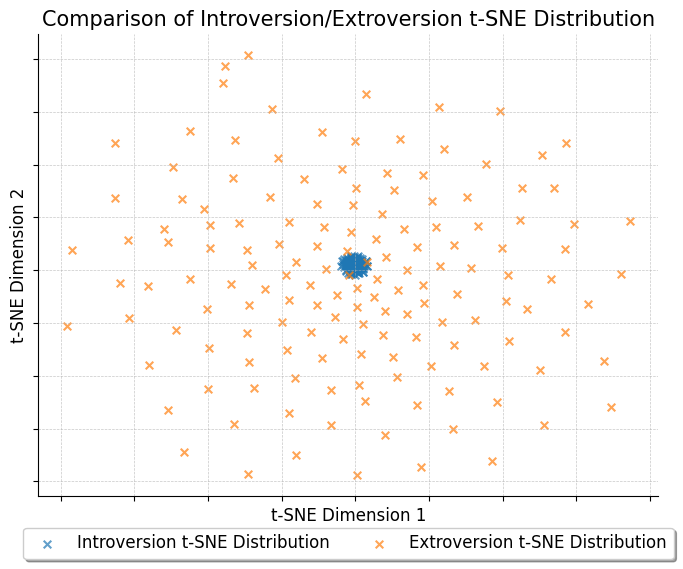

In [139]:
import matplotlib.pyplot as plt
import numpy as np



# 绘制 t-SNE 结果
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embedding0[:, 0], tsne_embedding0[:, 1], color="#1f77b4", label='Introversion t-SNE Distribution', alpha=0.7, s = 30, marker='x')
plt.scatter(tsne_embedding1[:, 0], tsne_embedding1[:, 1], color="#ff7f0e", label='Extroversion t-SNE Distribution', alpha=0.7, s = 30, marker='x')

# 添加图例
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), 
           fancybox=True, shadow=True, ncol=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 添加坐标轴标签和标题
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Comparison of Introversion/Extroversion t-SNE Distribution')

plt.rc('axes', titlesize=15)     # 设置图表标题的字体大小
plt.rc('axes', labelsize=12)     # 设置坐标轴标签的字体大小
plt.rc('legend', fontsize=12)    # 设置图例的字体大小
plt.tick_params(
    axis='both',          # 应用到x轴和y轴
    which='both',         # 应用到主刻度线和副刻度线
    bottom=True,          # 显示底部刻度线
    top=False,            # 不显示顶部刻度线
    left=True,            # 显示左侧刻度线
    right=False,          # 不显示右侧刻度线
    labelbottom=False,    # 不显示底部刻度标签
    labelleft=False       # 不显示左侧刻度标签
)
# plt.xticks([])  # 去掉 x 轴刻度
# plt.yticks([]) 
# 显示图表
# plt.show()
plt.savefig('tsne.pdf', format='pdf', bbox_inches='tight')